In [15]:
import re

In [9]:

txt = "The rain in Spain"
x = re.search("^The.*Spain$", txt)
print(x)


<re.Match object; span=(0, 17), match='The rain in Spain'>


In [4]:
import re
txt = "The rain in Spain"
x = re.findall("ai", txt)
print(x)


['ai', 'ai']


In [20]:
#The split() function returns a list where the string has been split at each match:
txt = "The rain in Spain"
x = re.split(r"\s",txt)
print(x) 

['The', 'rain', 'in', 'Spain']


In [3]:
#The sub() function replaces the matches with the text of your choice:

txt = "The rain in Spain"
x = re.sub(r"\s", "9", txt)
print(x)



The9rain9in9Spain


In [4]:
################## Assigmnet #################

#1
txt = "The rain in islamabad"
x = re.split(r"\s", txt)           #####\s → whitespace par split.
print(x)

['The', 'rain', 'in', 'islamabad']


In [ ]:
#2
txt = "The sun sets in Spain and shines silently"
x = re.findall(r"\bs\w+", txt, flags=re.IGNORECASE)
print(x)                     ###### \b → word boundary,
                             ###### s\w+ → words starting with "s" (or "S" because IGNORECASE).

['sun', 'sets', 'Spain', 'shines', 'silently']


In [ ]:
#3
txt = "Order 123 was shipped on 15th, expected in 7 days"
x = re.findall(r"\d+", txt)            #######\d+ → match one or more digits.
print(x)

['123', '15', '7']


In [25]:
#4
txt = "Regular Expressions are Powerful"
x = re.sub(r"[aeiouAEIOU]", "*", txt)      #####[aeiouAEIOU] → match vowels and replace.
print(x)      

R*g*l*r *xpr*ss**ns *r* P*w*rf*l


In [28]:
#5
txt = "HelloWorld"
x = re.fullmatch(r"[a-zA-Z]+", txt)           #####match only letters (no numbers or symbols).
print("Only letters" if x else "Contains other characters")

Only letters


In [ ]:
path = r"C:ewfolder\data.txt"  ###R is lia likhty hain k \ ko wo like \n consider krta is trha \\ dalni pary gi is lia r key to to raw string bn jay gi
print(path)

C:ewfolder\data.txt


In [5]:
import pandas as pd

In [6]:
readfile=pd.read_csv("titanic_data.csv")

In [25]:
print(readfile.info())  #### This will show all info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [9]:
######################## Feature Engineering ################

# .values_count()
readfile['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
#To add new column with values 
import re
readfile['title']=readfile['Name'].apply(lambda y:re.search(r'([A-Z][a-z]+)\.', y).group(1)) ##.apply function()

In [31]:
print(readfile['title'])

readfile['title'].value_counts()

0              Mr
1             Mrs
2            Miss
3             Mrs
4              Mr
          ...    
886    Rare Title
887          Miss
888          Miss
889            Mr
890            Mr
Name: title, Length: 891, dtype: object


title
Mr            517
Miss          182
Mrs           125
Master         40
Rare Title     27
Name: count, dtype: int64

In [ ]:
import seaborn as sns


<Axes: xlabel='title', ylabel='count'>

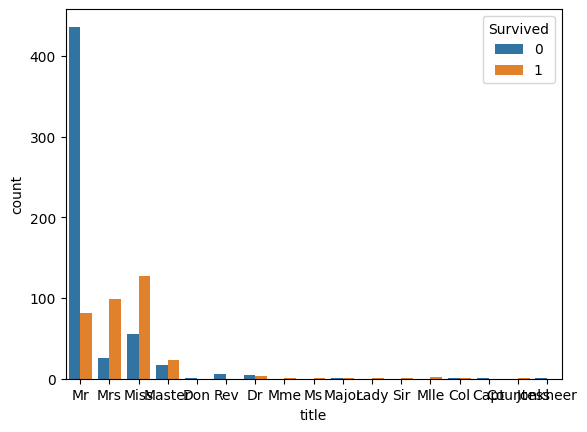

In [ ]:
sns.countplot(x='title',hue="Survived",data=readfile)

In [ ]:
##  To change column  name

readfile.loc[(~readfile['title'].isin(['Mr','Mrs','Miss','Master'])),'title'] = 'Rare Title'


In [30]:
print(readfile)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [32]:
readfile['title'].value_counts()

title
Mr            517
Miss          182
Mrs           125
Master         40
Rare Title     27
Name: count, dtype: int64

<Axes: xlabel='title', ylabel='count'>

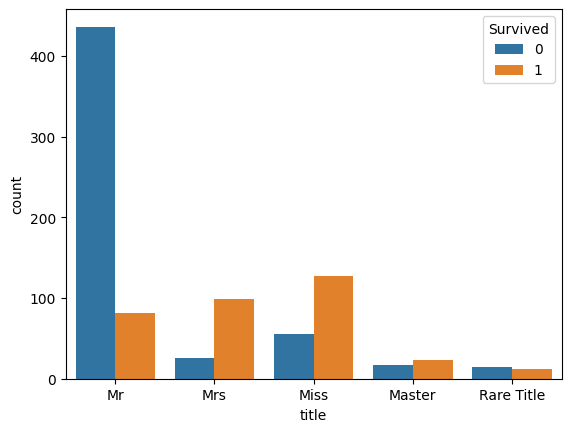

In [33]:
sns.countplot(x='title',hue="Survived",data=readfile)

In [34]:
readfile.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [36]:
readfile['Fsize']=readfile['SibSp']+ readfile['Parch']+1

<Axes: xlabel='Fsize', ylabel='count'>

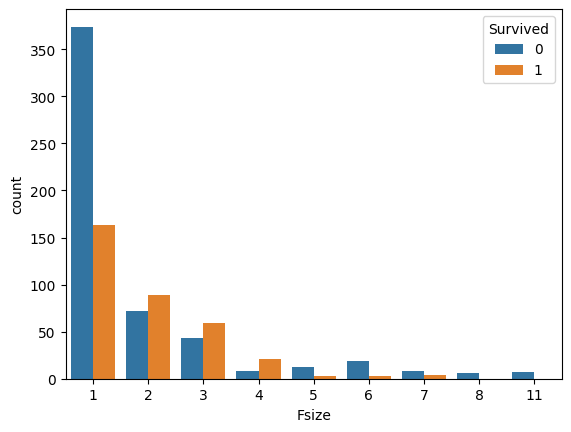

In [37]:
sns.countplot(x='Fsize',hue="Survived",data=readfile)